Import packages needed

In [1]:
#%%
#* Import the code needed
import os
from pathlib import Path
import numpy as np
import sys
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
from mpl_toolkits.mplot3d import Axes3D

Set directory path

In [2]:
#%%
#* Define paths
directory_path = Path('../../')

Import datasets

In [3]:
pop = pd.read_excel(
    directory_path / 'data' / 'regression_data' / 'Population' / 'regression_Population.xlsx',
    index_col=0)

PpD = pd.read_excel(
    directory_path / 'data' / 'regression_data' / 'PpD' / 'regression_PpD.xlsx',
    index_col=0)

UFApD = pd.read_excel(
    directory_path / 'data' / 'regression_data' / 'UFApD' / 'regression_UFApD.xlsx',
    index_col=0)

energy_intensity = pd.read_excel(
    directory_path / 'data' / 'cleaned_and_combined_data' / 'Energy_Intensity' / 'Energy_intensity_constants.xlsx',
    index_col=[0,1,2])

TS_cj = pd.read_excel(
    directory_path / 'data' / 'cleaned_and_combined_data' / 'Type_Split' / 'type_split_clean.xlsx',
    index_col=0)

lifetime = pd.read_excel(
    directory_path / 'data' / 'regression_data' / 'Dwelling_Lifetime' / 'lifetime_regression.xlsx',
    index_col=0)

lifetime_standard_deviation = pd.read_excel(
    directory_path / 'data' / 'regression_data' / 'Dwelling_Lifetime' / 'lifetime_regression.xlsx',
    index_col=0)

In [4]:
TS_cj

,% SFH,% TH,% AB
Age classes,,,
before 1900,0.980000,0.020000,0.000000
1901-1955,0.554235,0.197740,0.248024
1956 - 1970,0.529005,0.189334,0.281662
1971 - 1980,0.572690,0.189063,0.238247
1981 - 1990,0.612222,0.213791,0.173987
1991 - 2000,0.476144,0.241475,0.282381
2001 - 2010,0.336761,0.230478,0.432761
2011 and after,0.340235,0.247552,0.412213


In [5]:
TS_cj.loc['before 1900','% SFH']

0.98

Seperate out the lifetime and standard deviation datasets

In [6]:
#lifetime = lifetime.drop('std_dev', axis=1)
lifetime_standard_deviation = lifetime_standard_deviation.drop('Avg_lifetime', axis=1)

lifetime = lifetime.loc[:, 'Avg_lifetime'].to_numpy()
lifetime

lifetime_standard_deviation = lifetime_standard_deviation.loc[:, 'std_dev'].to_numpy()

Import DSM module

In [7]:
# getting the name of the directory where the this file is present.
current = os.path.dirname(os.path.realpath('this'))
 
# Getting the parent directory name where the current directory is present.
parent = os.path.dirname(current)
#make the UA path
module_path = parent + '/modules'
#append path to options to import from
sys.path.append(module_path)

from dynamic_stock_model import DynamicStockModel

Calculate stock from pop/PpD

In [8]:
stock_t = np.divide(pop.drop_duplicates(),PpD)

C:\Users\Solveig\AppData\Local\Temp\ipykernel_15608\4106792660.py:1: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  stock_t = np.divide(pop.drop_duplicates(),PpD)


Define a function that does the stock driven modeling

In [9]:
def calculate_inflow_by_type(inflow_t):
    SFH_inflow = pd.DataFrame()
    TH_inflow = pd.DataFrame()
    AB_inflow = pd.DataFrame()
    for year in inflow_t.columns:
        if int(year) <= 1900:
            iteration_SFH = pd.DataFrame(
                np.multiply(
                    inflow_t.loc[:,year],TS_cj.loc['before 1900','% SFH']
                    )
                )
            SFH_inflow = pd.concat([SFH_inflow, iteration_SFH], axis=1)
            iteration_TH = pd.DataFrame(
                np.multiply(
                    inflow_t.loc[:,year],TS_cj.loc['before 1900','% TH']
                    )
                )
            TH_inflow = pd.concat([TH_inflow, iteration_TH], axis=1)
            iteration_AB = pd.DataFrame(
                np.multiply(
                    inflow_t.loc[:,year],TS_cj.loc['before 1900','% AB']
                    )
                )
            AB_inflow = pd.concat([AB_inflow, iteration_AB], axis=1)
        if int(year) >= 1901 and int(year) <= 1955:
            iteration_SFH = pd.DataFrame(
                np.multiply(
                    inflow_t.loc[:,year],TS_cj.loc['1901-1955','% SFH']
                    )
                )
            SFH_inflow = pd.concat([SFH_inflow, iteration_SFH], axis=1)
            iteration_TH = pd.DataFrame(
                np.multiply(
                    inflow_t.loc[:,year],TS_cj.loc['1901-1955','% TH']
                    )
                )
            TH_inflow = pd.concat([TH_inflow, iteration_TH], axis=1)
            iteration_AB = pd.DataFrame(
                np.multiply(
                    inflow_t.loc[:,year],TS_cj.loc['1901-1955','% AB']
                    )
                )
            AB_inflow = pd.concat([AB_inflow, iteration_AB], axis=1)
        elif int(year) >= 1956 and int(year) <= 1970:
            iteration_SFH = pd.DataFrame(
                np.multiply(
                    inflow_t.loc[:,year],TS_cj.loc['1956 - 1970','% SFH']
                    )
                )
            SFH_inflow = pd.concat([SFH_inflow, iteration_SFH], axis=1)
            iteration_TH = pd.DataFrame(
                np.multiply(
                    inflow_t.loc[:,year],TS_cj.loc['1956 - 1970','% TH']
                    )
                )
            TH_inflow = pd.concat([TH_inflow, iteration_TH], axis=1)
            iteration_AB = pd.DataFrame(
                np.multiply(
                    inflow_t.loc[:,year],TS_cj.loc['1956 - 1970','% AB']
                    )
                )
            AB_inflow = pd.concat([AB_inflow, iteration_AB], axis=1)
        elif int(year) >= 1971 and int(year) <= 1980:
            iteration_SFH = pd.DataFrame(
                np.multiply(
                    inflow_t.loc[:,year],TS_cj.loc['1971 - 1980','% SFH']
                    )
                )
            SFH_inflow = pd.concat([SFH_inflow, iteration_SFH], axis=1)
            iteration_TH = pd.DataFrame(
                np.multiply(
                    inflow_t.loc[:,year],TS_cj.loc['1971 - 1980','% TH']
                    )
                )
            TH_inflow = pd.concat([TH_inflow, iteration_TH], axis=1)
            iteration_AB = pd.DataFrame(
                np.multiply(
                    inflow_t.loc[:,year],TS_cj.loc['1971 - 1980','% AB']
                    )
                )
            AB_inflow = pd.concat([AB_inflow, iteration_AB], axis=1)
        elif int(year) >= 1981 and int(year) <= 1990:
            iteration_SFH = pd.DataFrame(
                np.multiply(
                    inflow_t.loc[:,year],TS_cj.loc['1981 - 1990','% SFH']
                    )
                )
            SFH_inflow = pd.concat([SFH_inflow, iteration_SFH], axis=1)
            iteration_TH = pd.DataFrame(
                np.multiply(
                    inflow_t.loc[:,year],TS_cj.loc['1981 - 1990','% TH']
                    )
                )
            TH_inflow = pd.concat([TH_inflow, iteration_TH], axis=1)
            iteration_AB = pd.DataFrame(
                np.multiply(
                    inflow_t.loc[:,year],TS_cj.loc['1981 - 1990','% AB']
                    )
                )
            AB_inflow = pd.concat([AB_inflow, iteration_AB], axis=1)
        elif int(year) >= 1991 and int(year) <= 2000:
            iteration_SFH = pd.DataFrame(
                np.multiply(
                    inflow_t.loc[:,year],TS_cj.loc['1991 - 2000','% SFH']
                    )
                )
            SFH_inflow = pd.concat([SFH_inflow, iteration_SFH], axis=1)
            iteration_TH = pd.DataFrame(
                np.multiply(
                    inflow_t.loc[:,year],TS_cj.loc['1991 - 2000','% TH']
                    )
                )
            TH_inflow = pd.concat([TH_inflow, iteration_TH], axis=1)
            iteration_AB = pd.DataFrame(
                np.multiply(
                    inflow_t.loc[:,year],TS_cj.loc['1991 - 2000','% AB']
                    )
                )
            AB_inflow = pd.concat([AB_inflow, iteration_AB], axis=1)
        elif int(year) >= 2001 and int(year) <= 2010:
            iteration_SFH = pd.DataFrame(
                np.multiply(
                    inflow_t.loc[:,year],TS_cj.loc['2001 - 2010','% SFH']
                    )
                )
            SFH_inflow = pd.concat([SFH_inflow, iteration_SFH], axis=1)
            iteration_TH = pd.DataFrame(
                np.multiply(
                    inflow_t.loc[:,year],TS_cj.loc['2001 - 2010','% TH']
                    )
                )
            TH_inflow = pd.concat([TH_inflow, iteration_TH], axis=1)
            iteration_AB = pd.DataFrame(
                np.multiply(
                    inflow_t.loc[:,year],TS_cj.loc['2001 - 2010','% AB']
                    )
                )
            AB_inflow = pd.concat([AB_inflow, iteration_AB], axis=1)
        elif int(year) >= 2011:
            iteration_SFH = pd.DataFrame(
                np.multiply(
                    inflow_t.loc[:,year],TS_cj.loc['2011 and after','% SFH']
                    )
                )
            SFH_inflow = pd.concat([SFH_inflow, iteration_SFH], axis=1)
            iteration_TH = pd.DataFrame(
                np.multiply(
                    inflow_t.loc[:,year],TS_cj.loc['2011 and after','% TH']
                    )
                )
            TH_inflow = pd.concat([TH_inflow, iteration_TH], axis=1)
            iteration_AB = pd.DataFrame(
                np.multiply(
                    inflow_t.loc[:,year],TS_cj.loc['2011 and after','% AB']
                    )
                )
            AB_inflow = pd.concat([AB_inflow, iteration_AB], axis=1)
    return SFH_inflow, TH_inflow, AB_inflow

In [10]:
def stock_driven_model(stock):
    dwellings_stock_driven = DynamicStockModel(t=np.arange(1600, 2051),
                         s=stock['Pop'].to_numpy(),
                         lt={'Type': 'Normal', 
                             'Mean': lifetime,
                             'StdDev': lifetime_standard_deviation 
                             }
                        )
    
    dwellings_stock_driven.compute_stock_driven_model(
        NegativeInflowCorrect = True)
    
    inflow_t = pd.DataFrame(dwellings_stock_driven.i, index=np.arange(1600,2051))
    
    inflow_t_SFH, inflow_t_TH, inflow_t_AB = calculate_inflow_by_type(inflow_t.T)
    inflow_t_SFH = inflow_t_SFH.T
    inflow_t_TH = inflow_t_TH.T
    inflow_t_AB = inflow_t_AB.T
    
    return inflow_t_SFH, inflow_t_TH, inflow_t_AB

Run the stock driven model

In [11]:
i_SFH, i_TH, i_AB = stock_driven_model(stock_t)

In [12]:
i_SFH

,0
1600,72146.206526
1601,86.917974
1602,88.329757
1603,89.772627
1604,91.247654
...,...
2046,11708.234108
2047,11779.438077
2048,11852.658670
2049,11927.911469


Define a function that does the inflow driven modeling

In [13]:
def inflow_driven_model(inflow):
    dwellings_inflow_driven = DynamicStockModel(t=np.arange(1600, 2051),
                    i=inflow[0],
                    lt={'Type': 'Normal', 
                        'Mean': lifetime,
                        'StdDev': lifetime_standard_deviation 
                        }
                    )
    dwellings_inflow_driven.compute_s_c_inflow_driven()

    dwellings_inflow_driven.compute_stock_total()

    dwellings_inflow_driven.compute_o_c_from_s_c()

    return dwellings_inflow_driven.s_c, dwellings_inflow_driven.s, dwellings_inflow_driven.o_c

Run the inflow driven model

In [14]:
s_c_SFH, s_SFH, o_SFH = inflow_driven_model(i_SFH)
s_c_TH, s_TH, o_TH = inflow_driven_model(i_TH)
s_c_AB, s_AB, o_AB = inflow_driven_model(i_AB)

In [15]:
s_c_SFH

array([[7.21148685e+04, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.21122802e+04, 8.68802196e+01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.21094952e+04, 8.68771014e+01, 8.82913893e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.50180529e-06, 2.10041699e-09, 2.47679356e-09, ...,
        1.18526547e+04, 0.00000000e+00, 0.00000000e+00],
       [1.29302854e-06, 1.80929321e-09, 2.13452952e-09, ...,
        1.18526535e+04, 1.19279075e+04, 0.00000000e+00],
       [1.11273977e-06, 1.55777033e-09, 1.83867762e-09, ...,
        1.18526519e+04, 1.19279063e+04, 1.20051995e+04]])

In [16]:
i_SFH.rename(columns={0:'SFH'}, inplace=True)
i_TH.rename(columns={0:'TH'}, inplace=True)
i_AB.rename(columns={0:'AB'}, inplace=True)

In [17]:
i_SFH

,SFH
1600,72146.206526
1601,86.917974
1602,88.329757
1603,89.772627
1604,91.247654
...,...
2046,11708.234108
2047,11779.438077
2048,11852.658670
2049,11927.911469


Make s_c arrays into dataframes for easier use

In [18]:
UFApD.drop_duplicates(inplace=True)

s_SFH_df = pd.DataFrame(s_SFH)
s_SFH_df = s_SFH_df.set_index(UFApD.index)
s_SFH_df.columns = ['SFH']

s_TH_df = pd.DataFrame(s_TH)
s_TH_df = s_TH_df.set_index(UFApD.index)
s_TH_df.columns = ['TH']

s_AB_df = pd.DataFrame(s_AB)
s_AB_df = s_AB_df.set_index(UFApD.index)
s_AB_df.columns = ['AB']

s_c_SFH_df = pd.DataFrame(s_c_SFH)
s_c_SFH_df = s_c_SFH_df.set_index(UFApD.index)
s_c_SFH_df.columns = np.arange(1600, 2051)

s_c_TH_df = pd.DataFrame(s_c_TH)
s_c_TH_df = s_c_TH_df.set_index(UFApD.index)
s_c_TH_df.columns = np.arange(1600, 2051)

s_c_AB_df = pd.DataFrame(s_c_AB)
s_c_AB_df = s_c_AB_df.set_index(UFApD.index)
s_c_AB_df.columns = np.arange(1600, 2051)

i_SFH_df = pd.DataFrame(i_SFH)
i_SFH_df = i_SFH_df.set_index(UFApD.index)

o_SFH_df = pd.DataFrame(o_SFH)
o_SFH_df = o_SFH_df.set_index(UFApD.index)
o_SFH_df.columns = np.arange(1600, 2051)

i_TH_df = pd.DataFrame(i_TH)
i_TH_df = i_TH_df.set_index(UFApD.index)

o_TH_df = pd.DataFrame(o_TH)
o_TH_df = o_TH_df.set_index(UFApD.index)
o_TH_df.columns = np.arange(1600, 2051)

i_AB_df = pd.DataFrame(i_AB)
i_AB_df = i_AB_df.set_index(UFApD.index)

o_AB_df = pd.DataFrame(o_AB)
o_AB_df = o_AB_df.set_index(UFApD.index)
o_AB_df.columns = np.arange(1600, 2051)

Aggregate s_c dataframes into the cohorts from tabula for each type for plotting

In [19]:
SFH_stock_by_tabula_cohort = pd.DataFrame(
    data={'pre-1955': pd.DataFrame(s_c_SFH_df).loc[:,'1600':'1955'].sum(axis=1), 
          '1956-1970': pd.DataFrame(s_c_SFH_df).loc[:,'1956':'1970'].sum(axis=1), 
          '1971-1980': pd.DataFrame(s_c_SFH_df).loc[:,'1971':'1980'].sum(axis=1), 
          '1981-1990': pd.DataFrame(s_c_SFH_df).loc[:,'1981':'1990'].sum(axis=1), 
          '1991-2000': pd.DataFrame(s_c_SFH_df).loc[:,'1991':'2000'].sum(axis=1), 
          '2001-2010': pd.DataFrame(s_c_SFH_df).loc[:,'2001':'2010'].sum(axis=1), 
          'post-2010': pd.DataFrame(s_c_SFH_df).loc[:,'2011':'2050'].sum(axis=1)}
          )

TH_stock_by_tabula_cohort = pd.DataFrame(
    data={'pre-1955': pd.DataFrame(s_c_TH_df).loc[:,'1600':'1955'].sum(axis=1), 
          '1956-1970': pd.DataFrame(s_c_TH_df).loc[:,'1956':'1970'].sum(axis=1), 
          '1971-1980': pd.DataFrame(s_c_TH_df).loc[:,'1971':'1980'].sum(axis=1), 
          '1981-1990': pd.DataFrame(s_c_TH_df).loc[:,'1981':'1990'].sum(axis=1), 
          '1991-2000': pd.DataFrame(s_c_TH_df).loc[:,'1991':'2000'].sum(axis=1), 
          '2001-2010': pd.DataFrame(s_c_TH_df).loc[:,'2001':'2010'].sum(axis=1), 
          'post-2010': pd.DataFrame(s_c_TH_df).loc[:,'2011':'2050'].sum(axis=1)}
          )

AB_stock_by_tabula_cohort = pd.DataFrame(
    data={'pre-1955': pd.DataFrame(s_c_AB_df).loc[:,'1600':'1955'].sum(axis=1), 
          '1956-1970': pd.DataFrame(s_c_AB_df).loc[:,'1956':'1970'].sum(axis=1), 
          '1971-1980': pd.DataFrame(s_c_AB_df).loc[:,'1971':'1980'].sum(axis=1), 
          '1981-1990': pd.DataFrame(s_c_AB_df).loc[:,'1981':'1990'].sum(axis=1), 
          '1991-2000': pd.DataFrame(s_c_AB_df).loc[:,'1991':'2000'].sum(axis=1), 
          '2001-2010': pd.DataFrame(s_c_AB_df).loc[:,'2001':'2010'].sum(axis=1), 
          'post-2010': pd.DataFrame(s_c_AB_df).loc[:,'2011':'2050'].sum(axis=1)}
          )

Calculate total stock (s_total), total stock by cohort (s_c_total)

Calculate stock_changes by inflow - outflow for each type and aggregated

Calculate total inflows and outflows

In [20]:
s_total = s_SFH_df + s_TH_df + s_AB_df

total_stock_by_tabula_cohort = SFH_stock_by_tabula_cohort + TH_stock_by_tabula_cohort + AB_stock_by_tabula_cohort

stock_change_SFH = i_SFH_df.values - pd.DataFrame(o_SFH_df.sum(axis=1))
stock_change_SFH = pd.DataFrame(stock_change_SFH, index=np.arange(1600,2051))

stock_change_TH = i_TH_df.values - pd.DataFrame(o_TH_df.sum(axis=1))
stock_change_TH = pd.DataFrame(stock_change_TH, index=np.arange(1600,2051))

stock_change_AB = i_AB_df.values - pd.DataFrame(o_AB_df.sum(axis=1))
stock_change_AB = pd.DataFrame(stock_change_AB, index=np.arange(1600,2051))

stock_change_total = stock_change_SFH + stock_change_TH + stock_change_AB

i_total = i_SFH_df.values + i_TH_df.values + i_AB_df.values
i_total = pd.DataFrame(i_total, index=np.arange(1600,2051))

o_total = o_SFH_df + o_TH_df + o_AB_df

Convert number of dwellings into floor area by DSM cohort

In [21]:
s_UFA_c_SFH = s_c_SFH_df @ np.diag(UFApD['UFApD SFH'])
s_UFA_c_SFH = pd.DataFrame(s_UFA_c_SFH)
s_UFA_c_SFH.columns = np.arange(1600, 2051)

s_UFA_c_TH = s_c_TH_df @ np.diag(UFApD['UFApD TH'])
s_UFA_c_TH = pd.DataFrame(s_UFA_c_TH)
s_UFA_c_TH.columns = np.arange(1600, 2051)

s_UFA_c_AB = s_c_AB_df @ np.diag(UFApD['UFApD AB'])
s_UFA_c_AB = pd.DataFrame(s_UFA_c_AB)
s_UFA_c_AB.columns = np.arange(1600, 2051)

i_SFH_UFA = i_SFH_df.mul(UFApD['UFApD SFH'].values, axis=0)
i_SFH_UFA = pd.DataFrame(i_SFH_UFA)

o_SFH_UFA = o_SFH_df @ np.diag(UFApD['UFApD SFH'])
o_SFH_UFA = pd.DataFrame(o_SFH_UFA)
o_SFH_UFA.columns = np.arange(1600, 2051)

i_TH_UFA = i_TH_df.mul(UFApD['UFApD TH'].values, axis=0)
i_TH_UFA = pd.DataFrame(i_TH_UFA)

o_TH_UFA = o_TH_df @ np.diag(UFApD['UFApD TH'])
o_TH_UFA = pd.DataFrame(o_TH_UFA)
o_TH_UFA.columns = np.arange(1600, 2051)

i_AB_UFA = i_AB_df.mul(UFApD['UFApD AB'].values, axis=0)
i_AB_UFA = pd.DataFrame(i_AB_UFA)

o_AB_UFA = o_AB_df @ np.diag(UFApD['UFApD AB'])
o_AB_UFA = pd.DataFrame(o_AB_UFA)
o_AB_UFA.columns = np.arange(1600, 2051)

Make s_c_UFA arrays into dataframes for easier use

In [22]:
UFApD.drop_duplicates(inplace=True)

s_UFA_c_SFH_df = pd.DataFrame(s_UFA_c_SFH)
s_UFA_c_SFH_df = s_UFA_c_SFH_df.set_index(UFApD.index)
s_UFA_c_SFH_df.columns = np.arange(1600, 2051)
s_UFA_c_SFH_df

s_UFA_c_TH_df = pd.DataFrame(s_UFA_c_TH)
s_UFA_c_TH_df = s_UFA_c_TH_df.set_index(UFApD.index)
s_UFA_c_TH_df.columns = np.arange(1600, 2051)
s_UFA_c_TH_df

s_UFA_c_AB_df = pd.DataFrame(s_UFA_c_AB)
s_UFA_c_AB_df = s_UFA_c_AB_df.set_index(UFApD.index)
s_UFA_c_AB_df.columns = np.arange(1600, 2051)
s_UFA_c_AB_df

,1600,1601,1602,1603,1604,1605,1606,1607,1608,1609,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
Year,,,,,,,,,,,,,,,,,,,,,
1600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1601,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1602,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1603,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1604,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.004402e+06,1.009507e+06,1.014769e+06,1.020193e+06,1.025783e+06,1.031541e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2047,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.004402e+06,1.009507e+06,1.014769e+06,1.020193e+06,1.025783e+06,1.031541e+06,1.037471e+06,0.000000e+00,0.000000e+00,0.000000e+00
2048,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.004401e+06,1.009506e+06,1.014769e+06,1.020193e+06,1.025782e+06,1.031541e+06,1.037471e+06,1.043574e+06,0.000000e+00,0.000000e+00


Aggregate s_c dataframes into the cohorts from tabula for each type for plotting

In [23]:
SFH_UFA_stock_by_tabula_cohort = pd.DataFrame(
    data={'pre-1955': pd.DataFrame(s_UFA_c_SFH_df).loc[:,'1600':'1955'].sum(axis=1), 
          '1956-1970': pd.DataFrame(s_UFA_c_SFH_df).loc[:,'1956':'1970'].sum(axis=1), 
          '1971-1980': pd.DataFrame(s_UFA_c_SFH_df).loc[:,'1971':'1980'].sum(axis=1), 
          '1981-1990': pd.DataFrame(s_UFA_c_SFH_df).loc[:,'1981':'1990'].sum(axis=1), 
          '1991-2000': pd.DataFrame(s_UFA_c_SFH_df).loc[:,'1991':'2000'].sum(axis=1), 
          '2001-2010': pd.DataFrame(s_UFA_c_SFH_df).loc[:,'2001':'2010'].sum(axis=1), 
          'post-2010': pd.DataFrame(s_UFA_c_SFH_df).loc[:,'2011':'2050'].sum(axis=1)}
          )

TH_UFA_stock_by_tabula_cohort = pd.DataFrame(
    data={'pre-1955': pd.DataFrame(s_UFA_c_TH_df).loc[:,'1600':'1955'].sum(axis=1), 
          '1956-1970': pd.DataFrame(s_UFA_c_TH_df).loc[:,'1956':'1970'].sum(axis=1), 
          '1971-1980': pd.DataFrame(s_UFA_c_TH_df).loc[:,'1971':'1980'].sum(axis=1), 
          '1981-1990': pd.DataFrame(s_UFA_c_TH_df).loc[:,'1981':'1990'].sum(axis=1), 
          '1991-2000': pd.DataFrame(s_UFA_c_TH_df).loc[:,'1991':'2000'].sum(axis=1), 
          '2001-2010': pd.DataFrame(s_UFA_c_TH_df).loc[:,'2001':'2010'].sum(axis=1), 
          'post-2010': pd.DataFrame(s_UFA_c_TH_df).loc[:,'2011':'2050'].sum(axis=1)}
          )

AB_UFA_stock_by_tabula_cohort = pd.DataFrame(
    data={'pre-1955': pd.DataFrame(s_UFA_c_AB_df).loc[:,'1600':'1955'].sum(axis=1), 
          '1956-1970': pd.DataFrame(s_UFA_c_AB_df).loc[:,'1956':'1970'].sum(axis=1), 
          '1971-1980': pd.DataFrame(s_UFA_c_AB_df).loc[:,'1971':'1980'].sum(axis=1), 
          '1981-1990': pd.DataFrame(s_UFA_c_AB_df).loc[:,'1981':'1990'].sum(axis=1), 
          '1991-2000': pd.DataFrame(s_UFA_c_AB_df).loc[:,'1991':'2000'].sum(axis=1), 
          '2001-2010': pd.DataFrame(s_UFA_c_AB_df).loc[:,'2001':'2010'].sum(axis=1), 
          'post-2010': pd.DataFrame(s_UFA_c_AB_df).loc[:,'2011':'2050'].sum(axis=1)}
          )

Calculate total stock (s_total), total stock by cohort (s_c_total)

Calculate stock_changes by inflow - outflow for each type and aggregated

Calculate total inflows and outflows

In [24]:
s_UFA_total = s_UFA_c_SFH.sum(axis=1) + s_UFA_c_TH.sum(axis=1) + s_UFA_c_AB.sum(axis=1)

total_stock_UFA_by_tabula_cohort = SFH_UFA_stock_by_tabula_cohort + TH_UFA_stock_by_tabula_cohort + AB_UFA_stock_by_tabula_cohort

stock_change_SFH_UFA = i_SFH_UFA.values - pd.DataFrame(o_SFH_UFA.sum(axis=1))
stock_change_SFH_UFA = pd.DataFrame(stock_change_SFH_UFA, index=np.arange(1600,2051))

stock_change_TH_UFA = i_TH_UFA.values - pd.DataFrame(o_TH_UFA.sum(axis=1))
stock_change_TH_UFA = pd.DataFrame(stock_change_TH_UFA, index=np.arange(1600,2051))

stock_change_AB_UFA = i_AB_UFA.values - pd.DataFrame(o_AB_UFA.sum(axis=1))
stock_change_AB_UFA = pd.DataFrame(stock_change_AB_UFA, index=np.arange(1600,2051))

stock_change_total_UFA = stock_change_SFH_UFA + stock_change_TH_UFA + stock_change_AB_UFA

i_total_UFA = i_SFH_UFA.values + i_TH_UFA.values + i_AB_UFA.values
i_total_UFA = pd.DataFrame(i_total_UFA, index=np.arange(1600,2051))

o_total_UFA = o_SFH_UFA + o_TH_UFA + o_AB_UFA

Define a function that calculates energy use for SFH, original renovation level

In [25]:
def energy_use_calculation_SFH(stock_c_UFA):
    energy_use_matrix = pd.DataFrame()
    for year in stock_c_UFA.columns:
        if int(year) <= 1955:
            iteration = pd.DataFrame(np.multiply(s_UFA_c_SFH.loc[:, year],energy_intensity.loc[('pre 1955' , 'SFH', 'OG'),'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat([energy_use_matrix, iteration], axis=1)
        elif int(year) >= 1956 and int(year) <= 1970:
            iteration = pd.DataFrame(np.multiply(s_UFA_c_SFH.loc[:, year],energy_intensity.loc[('1956-70' , 'SFH', 'OG'),'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat([energy_use_matrix, iteration], axis=1)
        elif int(year) >= 1971 and int(year) <= 1980:
            iteration = pd.DataFrame(np.multiply(s_UFA_c_SFH.loc[:, year],energy_intensity.loc[('1971-80' , 'SFH', 'OG'),'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat([energy_use_matrix, iteration], axis=1)
        elif int(year) >= 1981 and int(year) <= 1990:
            iteration = pd.DataFrame(np.multiply(s_UFA_c_SFH.loc[:, year],energy_intensity.loc[('1981-90' , 'SFH', 'OG'),'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat([energy_use_matrix, iteration], axis=1)
        elif int(year) >= 1991 and int(year) <= 2000:
            iteration = pd.DataFrame(np.multiply(s_UFA_c_SFH.loc[:, year],energy_intensity.loc[('1991-2000' , 'SFH', 'OG'),'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat([energy_use_matrix, iteration], axis=1)
        elif int(year) >= 2001 and int(year) <= 2010:
            iteration = pd.DataFrame(np.multiply(s_UFA_c_SFH.loc[:, year],energy_intensity.loc[('2001-2010' , 'SFH', 'OG'),'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat([energy_use_matrix, iteration], axis=1)
        elif int(year) >= 2011:
            iteration = pd.DataFrame(np.multiply(s_UFA_c_SFH.loc[:, year],energy_intensity.loc[('2011-' , 'SFH', 'OG'),'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat([energy_use_matrix, iteration], axis=1)
    return energy_use_matrix

Run function that spits out energy use of SFH by DSM cohort

In [26]:
energy_use_matrix_SFH = energy_use_calculation_SFH(s_UFA_c_SFH)

calculate vector of energy use for SFH (not by cohort)

In [27]:
energy_use_vector_SFH = energy_use_matrix_SFH.sum(axis=1)

Define a function that calculates energy use for TH, original renovation level

In [28]:
def energy_use_calculation_TH(stock_c_UFA):
    energy_use_matrix = pd.DataFrame()
    for year in stock_c_UFA.columns:
        if int(year) <= 1955:
            iteration = pd.DataFrame(np.multiply(s_UFA_c_TH.loc[:, year],energy_intensity.loc[('pre 1955' , 'TH', 'OG'),'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat([energy_use_matrix, iteration], axis=1)
        elif int(year) >= 1956 and int(year) <= 1970:
            iteration = pd.DataFrame(np.multiply(s_UFA_c_TH.loc[:, year],energy_intensity.loc[('1956-70' , 'TH', 'OG'),'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat([energy_use_matrix, iteration], axis=1)
        elif int(year) >= 1971 and int(year) <= 1980:
            iteration = pd.DataFrame(np.multiply(s_UFA_c_TH.loc[:, year],energy_intensity.loc[('1971-80' , 'TH', 'OG'),'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat([energy_use_matrix, iteration], axis=1)
        elif int(year) >= 1981 and int(year) <= 1990:
            iteration = pd.DataFrame(np.multiply(s_UFA_c_TH.loc[:, year],energy_intensity.loc[('1981-90' , 'TH', 'OG'),'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat([energy_use_matrix, iteration], axis=1)
        elif int(year) >= 1991 and int(year) <= 2000:
            iteration = pd.DataFrame(np.multiply(s_UFA_c_TH.loc[:, year],energy_intensity.loc[('1991-2000' , 'TH', 'OG'),'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat([energy_use_matrix, iteration], axis=1)
        elif int(year) >= 2001 and int(year) <= 2010:
            iteration = pd.DataFrame(np.multiply(s_UFA_c_TH.loc[:, year],energy_intensity.loc[('2001-2010' , 'TH', 'OG'),'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat([energy_use_matrix, iteration], axis=1)
        elif int(year) >= 2011:
            iteration = pd.DataFrame(np.multiply(s_UFA_c_TH.loc[:, year],energy_intensity.loc[('2011-' , 'TH', 'OG'),'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat([energy_use_matrix, iteration], axis=1)
    return energy_use_matrix

Run function that spits out energy use of TH by DSM cohort

In [29]:
energy_use_matrix_TH = energy_use_calculation_TH(s_UFA_c_TH)

calculate vector of energy use for TH (not by cohort)

In [30]:
energy_use_vector_TH = energy_use_matrix_TH.sum(axis=1)

Define a function that calculates energy use for AB, original renovation level

In [31]:
def energy_use_calculation_AB(stock_c_UFA):
    energy_use_matrix = pd.DataFrame()
    for year in stock_c_UFA.columns:
        if int(year) <= 1955:
            iteration = pd.DataFrame(np.multiply(s_UFA_c_AB.loc[:, year],energy_intensity.loc[('pre 1955' , 'AB', 'OG'),'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat([energy_use_matrix, iteration], axis=1)
        elif int(year) >= 1956 and int(year) <= 1970:
            iteration = pd.DataFrame(np.multiply(s_UFA_c_AB.loc[:, year],energy_intensity.loc[('1956-70' , 'AB', 'OG'),'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat([energy_use_matrix, iteration], axis=1)
        elif int(year) >= 1971 and int(year) <= 1980:
            iteration = pd.DataFrame(np.multiply(s_UFA_c_AB.loc[:, year],energy_intensity.loc[('1971-80' , 'AB', 'OG'),'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat([energy_use_matrix, iteration], axis=1)
        elif int(year) >= 1981 and int(year) <= 1990:
            iteration = pd.DataFrame(np.multiply(s_UFA_c_AB.loc[:, year],energy_intensity.loc[('1981-90' , 'AB', 'OG'),'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat([energy_use_matrix, iteration], axis=1)
        elif int(year) >= 1991 and int(year) <= 2000:
            iteration = pd.DataFrame(np.multiply(s_UFA_c_AB.loc[:, year],energy_intensity.loc[('1991-2000' , 'AB', 'OG'),'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat([energy_use_matrix, iteration], axis=1)
        elif int(year) >= 2001 and int(year) <= 2010:
            iteration = pd.DataFrame(np.multiply(s_UFA_c_AB.loc[:, year],energy_intensity.loc[('2001-2010' , 'AB', 'OG'),'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat([energy_use_matrix, iteration], axis=1)
        elif int(year) >= 2011:
            iteration = pd.DataFrame(np.multiply(s_UFA_c_AB.loc[:, year],energy_intensity.loc[('2011-' , 'AB', 'OG'),'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat([energy_use_matrix, iteration], axis=1)
    return energy_use_matrix

Run function that spits out energy use of AB by DSM cohort

In [32]:
energy_use_matrix_AB = energy_use_calculation_AB(s_UFA_c_AB)

calculate vector of energy use for AB (not by cohort)

In [33]:
energy_use_vector_AB = energy_use_matrix_AB.sum(axis=1)

Calculate total energy use matrix

In [34]:
energy_use_matrix_total = energy_use_matrix_SFH + energy_use_matrix_TH + energy_use_matrix_AB

Concatenate energy use vectors

In [35]:
energy_use_vectors_concatenated = pd.concat([energy_use_vector_SFH, energy_use_vector_TH, energy_use_vector_AB], axis=1)
energy_use_vectors_concatenated = energy_use_vectors_concatenated.rename(columns={0: 'SFH', 1: 'TH', 2: 'AB'})

#energy_use_vectors_concatenated = pd.concat([energy_use_vectors_concatenat1, energy_use_vector_AB], axis=1)

energy_use_vectors_concatenated 

,SFH,TH,AB
Year,,,
1600,5.437150e+09,5.548318e+07,0.000000e+00
1601,5.443498e+09,5.554801e+07,0.000000e+00
1602,5.449931e+09,5.561374e+07,0.000000e+00
1603,5.456449e+09,5.568039e+07,0.000000e+00
1604,5.463054e+09,5.574798e+07,0.000000e+00
...,...,...,...
2046,4.811045e+10,1.033055e+10,8.446063e+09
2047,4.782838e+10,1.033882e+10,8.495300e+09
2048,4.753928e+10,1.034571e+10,8.543762e+09


Put energy use matrix into tabula cohorts

In [36]:
energy_use_matrix_total_tabula_cohort = pd.DataFrame(
    data={'pre-1955': pd.DataFrame(energy_use_matrix_total).loc[:,'1600':'1955'].sum(axis=1)/1000000000, 
          '1956-1970': pd.DataFrame(energy_use_matrix_total).loc[:,'1956':'1970'].sum(axis=1)/1000000000, 
          '1971-1980': pd.DataFrame(energy_use_matrix_total).loc[:,'1971':'1980'].sum(axis=1)/1000000000, 
          '1981-1990': pd.DataFrame(energy_use_matrix_total).loc[:,'1981':'1990'].sum(axis=1)/1000000000, 
          '1991-2000': pd.DataFrame(energy_use_matrix_total).loc[:,'1991':'2000'].sum(axis=1)/1000000000, 
          '2001-2010': pd.DataFrame(energy_use_matrix_total).loc[:,'2001':'2010'].sum(axis=1)/1000000000, 
          'post-2010': pd.DataFrame(energy_use_matrix_total).loc[:,'2011':'2050'].sum(axis=1)/1000000000}
          )

Calculate total energy use

In [37]:
total_energy_use = energy_use_vector_SFH + energy_use_vector_TH + energy_use_vector_AB

PpD for sensitivity analysis:

C:\Users\Solveig\AppData\Local\Temp\ipykernel_15608\1000837068.py:9: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  stock_t_modified = np.divide(pop.drop_duplicates(), PpD_modified)


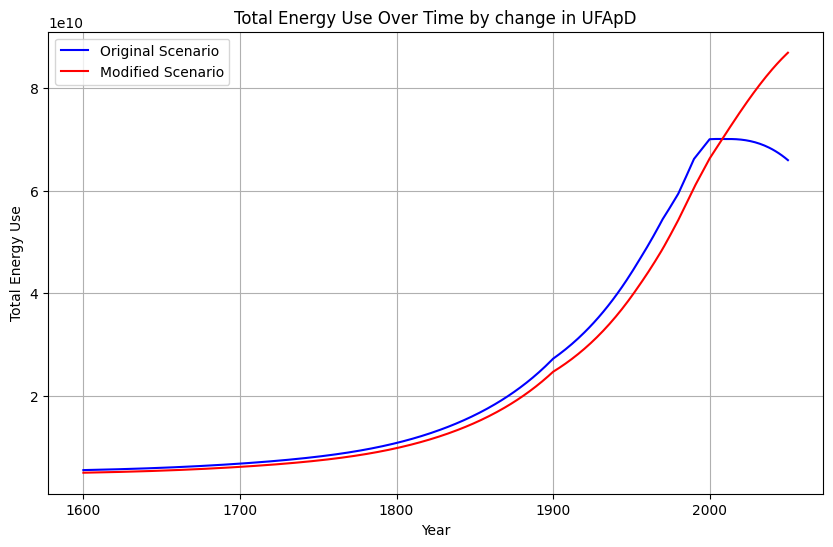

When we make the PpD 10% bigger, the total energy use reduces by an average of 6.98%.


In [38]:
# Sensitivity analysis: Modify PpD to be 10% less
PpD_modified = PpD * 1.1
pop_aligned = pop.drop_duplicates()
PpD_modified_np = PpD_modified.to_numpy()
stock_t_modified = np.divide(pop_aligned, PpD_modified_np)


# Recalculate stock with modified PpD
stock_t_modified = np.divide(pop.drop_duplicates(), PpD_modified)

# Run the stock driven model with modified PpD
i_SFH_modified, i_TH_modified, i_AB_modified = stock_driven_model(stock_t_modified)

# Run the inflow driven model for the modified scenario
s_c_SFH_modified, s_SFH_modified, o_SFH_modified = inflow_driven_model(i_SFH_modified)
s_c_TH_modified, s_TH_modified, o_TH_modified = inflow_driven_model(i_TH_modified)
s_c_AB_modified, s_AB_modified, o_AB_modified = inflow_driven_model(i_AB_modified)

# Ensure UFApD dataframe doesn't have duplicate indices
UFApD.drop_duplicates(inplace=True)
s_UFA_c_SFH_modified = s_c_SFH_modified @ np.diag(UFApD['UFApD SFH'])
s_UFA_c_TH_modified = s_c_TH_modified @ np.diag(UFApD['UFApD TH'])
s_UFA_c_AB_modified = s_c_AB_modified @ np.diag(UFApD['UFApD AB'])
# Convert the modified stocks to DataFrames (if not already done)
s_UFA_c_SFH_modified_df = pd.DataFrame(s_UFA_c_SFH_modified, index=np.arange(1600, 2051))
s_UFA_c_TH_modified_df = pd.DataFrame(s_UFA_c_TH_modified, index=np.arange(1600, 2051))
s_UFA_c_AB_modified_df = pd.DataFrame(s_UFA_c_AB_modified, index=np.arange(1600, 2051))

def energy_use_calculation_SFH(stock_c_UFA, energy_intensity):
    energy_use_matrix = pd.DataFrame()
    for year in stock_c_UFA.columns:
        if int(year) <= 1955:
            intensity = energy_intensity.loc[('pre 1955', 'SFH', 'OG'), 'Energy intensity  (kWh/m2a)']
        elif int(year) <= 1970:
            intensity = energy_intensity.loc[('1956-70', 'SFH', 'OG'), 'Energy intensity  (kWh/m2a)']
        elif int(year) <= 1980:
            intensity = energy_intensity.loc[('1971-80', 'SFH', 'OG'), 'Energy intensity  (kWh/m2a)']
        elif int(year) <= 1990:
            intensity = energy_intensity.loc[('1981-90', 'SFH', 'OG'), 'Energy intensity  (kWh/m2a)']
        elif int(year) <= 2000:
            intensity = energy_intensity.loc[('1991-2000', 'SFH', 'OG'), 'Energy intensity  (kWh/m2a)']
        elif int(year) <= 2010:
            intensity = energy_intensity.loc[('2001-2010', 'SFH', 'OG'), 'Energy intensity  (kWh/m2a)']
        else:
            intensity = energy_intensity.loc[('2011-', 'SFH', 'OG'), 'Energy intensity  (kWh/m2a)']
        
        iteration = pd.DataFrame(np.multiply(stock_c_UFA.loc[:, year], intensity))
        energy_use_matrix = pd.concat([energy_use_matrix, iteration], axis=1)
    return energy_use_matrix

def energy_use_calculation_TH (stock_c_UFA, energy_intensity):
    energy_use_matrix = pd.DataFrame()
    for year in stock_c_UFA.columns:
        if int(year) <= 1955:
            intensity = energy_intensity.loc[('pre 1955', 'SFH', 'OG'), 'Energy intensity  (kWh/m2a)']
        elif int(year) <= 1970:
            intensity = energy_intensity.loc[('1956-70', 'SFH', 'OG'), 'Energy intensity  (kWh/m2a)']
        elif int(year) <= 1980:
            intensity = energy_intensity.loc[('1971-80', 'SFH', 'OG'), 'Energy intensity  (kWh/m2a)']
        elif int(year) <= 1990:
            intensity = energy_intensity.loc[('1981-90', 'SFH', 'OG'), 'Energy intensity  (kWh/m2a)']
        elif int(year) <= 2000:
            intensity = energy_intensity.loc[('1991-2000', 'SFH', 'OG'), 'Energy intensity  (kWh/m2a)']
        elif int(year) <= 2010:
            intensity = energy_intensity.loc[('2001-2010', 'SFH', 'OG'), 'Energy intensity  (kWh/m2a)']
        else:
            intensity = energy_intensity.loc[('2011-', 'SFH', 'OG'), 'Energy intensity  (kWh/m2a)']
        
        iteration = pd.DataFrame(np.multiply(stock_c_UFA.loc[:, year], intensity))
        energy_use_matrix = pd.concat([energy_use_matrix, iteration], axis=1)
    return energy_use_matrix

def energy_use_calculation_AB (stock_c_UFA, energy_intensity):
    energy_use_matrix = pd.DataFrame()
    for year in stock_c_UFA.columns:
        if int(year) <= 1955:
            intensity = energy_intensity.loc[('pre 1955', 'SFH', 'OG'), 'Energy intensity  (kWh/m2a)']
        elif int(year) <= 1970:
            intensity = energy_intensity.loc[('1956-70', 'SFH', 'OG'), 'Energy intensity  (kWh/m2a)']
        elif int(year) <= 1980:
            intensity = energy_intensity.loc[('1971-80', 'SFH', 'OG'), 'Energy intensity  (kWh/m2a)']
        elif int(year) <= 1990:
            intensity = energy_intensity.loc[('1981-90', 'SFH', 'OG'), 'Energy intensity  (kWh/m2a)']
        elif int(year) <= 2000:
            intensity = energy_intensity.loc[('1991-2000', 'SFH', 'OG'), 'Energy intensity  (kWh/m2a)']
        elif int(year) <= 2010:
            intensity = energy_intensity.loc[('2001-2010', 'SFH', 'OG'), 'Energy intensity  (kWh/m2a)']
        else:
            intensity = energy_intensity.loc[('2011-', 'SFH', 'OG'), 'Energy intensity  (kWh/m2a)']
        
        iteration = pd.DataFrame(np.multiply(stock_c_UFA.loc[:, year], intensity))
        energy_use_matrix = pd.concat([energy_use_matrix, iteration], axis=1)
    return energy_use_matrix


energy_use_vector_SFH_modified = energy_use_calculation_SFH(s_UFA_c_SFH_modified_df, energy_intensity).sum(axis=1)
energy_use_vector_TH_modified = energy_use_calculation_TH(s_UFA_c_TH_modified_df, energy_intensity).sum(axis=1)
energy_use_vector_AB_modified = energy_use_calculation_AB(s_UFA_c_AB_modified_df, energy_intensity).sum(axis=1)

# Calculate total energy use for the modified scenario
modified_total_energy_use = energy_use_vector_SFH_modified + energy_use_vector_TH_modified + energy_use_vector_AB_modified

modified_total_energy_use

import matplotlib.pyplot as plt

# Assuming total_energy_use and modified_total_energy_use are already calculated
years = np.arange(1600, 2051)

plt.figure(figsize=(10, 6))
plt.plot(years, total_energy_use, label='Original Scenario', color='blue')
plt.plot(years, modified_total_energy_use, label='Modified Scenario', color='red')
plt.title('Total Energy Use Over Time by change in UFApD')
plt.xlabel('Year')
plt.ylabel('Total Energy Use')
plt.legend()
plt.grid(True)
plt.show()

# Calculate the percentage reduction in total energy use
reduction_percentage = ((total_energy_use - modified_total_energy_use) / total_energy_use) * 100

# Calculate the average reduction percentage over the entire time period
average_reduction_percentage = reduction_percentage.mean()

# Print the average reduction percentage
print(f"When we make the PpD 10% bigger, the total energy use reduces by an average of {average_reduction_percentage:.2f}%.")

UFApD sensitivity analysis

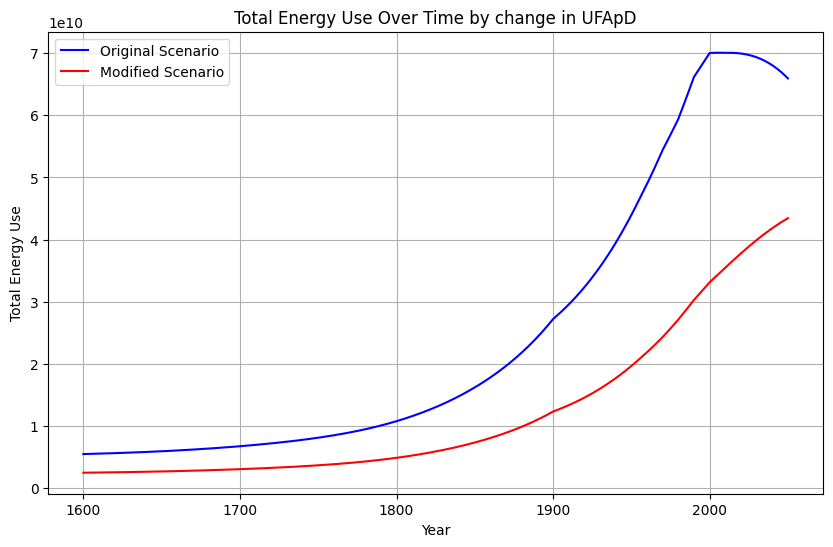

When we make the UFApD twice lower, the total energy use reduces by an average of 53.49%.


In [39]:

UFApD['UFApD SFH'] /= 2
UFApD['UFApD TH'] /= 2
UFApD['UFApD AB'] /= 2

# Ensure there are no duplicate indices
UFApD.drop_duplicates(inplace=True)

# Ensure UFApD dataframe doesn't have duplicate indices
UFApD.drop_duplicates(inplace=True)
s_UFA_c_SFH_modified = s_c_SFH_modified @ np.diag(UFApD['UFApD SFH'])
s_UFA_c_TH_modified = s_c_TH_modified @ np.diag(UFApD['UFApD TH'])
s_UFA_c_AB_modified = s_c_AB_modified @ np.diag(UFApD['UFApD AB'])
# Convert the modified stocks to DataFrames (if not already done)
s_UFA_c_SFH_modified_df = pd.DataFrame(s_UFA_c_SFH_modified, index=np.arange(1600, 2051))
s_UFA_c_TH_modified_df = pd.DataFrame(s_UFA_c_TH_modified, index=np.arange(1600, 2051))
s_UFA_c_AB_modified_df = pd.DataFrame(s_UFA_c_AB_modified, index=np.arange(1600, 2051))

def energy_use_calculation_SFH(stock_c_UFA, energy_intensity):
    energy_use_matrix = pd.DataFrame()
    for year in stock_c_UFA.columns:
        if int(year) <= 1955:
            intensity = energy_intensity.loc[('pre 1955', 'SFH', 'OG'), 'Energy intensity  (kWh/m2a)']
        elif int(year) <= 1970:
            intensity = energy_intensity.loc[('1956-70', 'SFH', 'OG'), 'Energy intensity  (kWh/m2a)']
        elif int(year) <= 1980:
            intensity = energy_intensity.loc[('1971-80', 'SFH', 'OG'), 'Energy intensity  (kWh/m2a)']
        elif int(year) <= 1990:
            intensity = energy_intensity.loc[('1981-90', 'SFH', 'OG'), 'Energy intensity  (kWh/m2a)']
        elif int(year) <= 2000:
            intensity = energy_intensity.loc[('1991-2000', 'SFH', 'OG'), 'Energy intensity  (kWh/m2a)']
        elif int(year) <= 2010:
            intensity = energy_intensity.loc[('2001-2010', 'SFH', 'OG'), 'Energy intensity  (kWh/m2a)']
        else:
            intensity = energy_intensity.loc[('2011-', 'SFH', 'OG'), 'Energy intensity  (kWh/m2a)']
        
        iteration = pd.DataFrame(np.multiply(stock_c_UFA.loc[:, year], intensity))
        energy_use_matrix = pd.concat([energy_use_matrix, iteration], axis=1)
    return energy_use_matrix

def energy_use_calculation_TH (stock_c_UFA, energy_intensity):
    energy_use_matrix = pd.DataFrame()
    for year in stock_c_UFA.columns:
        if int(year) <= 1955:
            intensity = energy_intensity.loc[('pre 1955', 'SFH', 'OG'), 'Energy intensity  (kWh/m2a)']
        elif int(year) <= 1970:
            intensity = energy_intensity.loc[('1956-70', 'SFH', 'OG'), 'Energy intensity  (kWh/m2a)']
        elif int(year) <= 1980:
            intensity = energy_intensity.loc[('1971-80', 'SFH', 'OG'), 'Energy intensity  (kWh/m2a)']
        elif int(year) <= 1990:
            intensity = energy_intensity.loc[('1981-90', 'SFH', 'OG'), 'Energy intensity  (kWh/m2a)']
        elif int(year) <= 2000:
            intensity = energy_intensity.loc[('1991-2000', 'SFH', 'OG'), 'Energy intensity  (kWh/m2a)']
        elif int(year) <= 2010:
            intensity = energy_intensity.loc[('2001-2010', 'SFH', 'OG'), 'Energy intensity  (kWh/m2a)']
        else:
            intensity = energy_intensity.loc[('2011-', 'SFH', 'OG'), 'Energy intensity  (kWh/m2a)']
        
        iteration = pd.DataFrame(np.multiply(stock_c_UFA.loc[:, year], intensity))
        energy_use_matrix = pd.concat([energy_use_matrix, iteration], axis=1)
    return energy_use_matrix


def energy_use_calculation_AB (stock_c_UFA, energy_intensity):
    energy_use_matrix = pd.DataFrame()
    for year in stock_c_UFA.columns:
        if int(year) <= 1955:
            intensity = energy_intensity.loc[('pre 1955', 'SFH', 'OG'), 'Energy intensity  (kWh/m2a)']
        elif int(year) <= 1970:
            intensity = energy_intensity.loc[('1956-70', 'SFH', 'OG'), 'Energy intensity  (kWh/m2a)']
        elif int(year) <= 1980:
            intensity = energy_intensity.loc[('1971-80', 'SFH', 'OG'), 'Energy intensity  (kWh/m2a)']
        elif int(year) <= 1990:
            intensity = energy_intensity.loc[('1981-90', 'SFH', 'OG'), 'Energy intensity  (kWh/m2a)']
        elif int(year) <= 2000:
            intensity = energy_intensity.loc[('1991-2000', 'SFH', 'OG'), 'Energy intensity  (kWh/m2a)']
        elif int(year) <= 2010:
            intensity = energy_intensity.loc[('2001-2010', 'SFH', 'OG'), 'Energy intensity  (kWh/m2a)']
        else:
            intensity = energy_intensity.loc[('2011-', 'SFH', 'OG'), 'Energy intensity  (kWh/m2a)']
        
        iteration = pd.DataFrame(np.multiply(stock_c_UFA.loc[:, year], intensity))
        energy_use_matrix = pd.concat([energy_use_matrix, iteration], axis=1)
    return energy_use_matrix

energy_use_vector_SFH_modified = energy_use_calculation_SFH(s_UFA_c_SFH_modified_df, energy_intensity).sum(axis=1)
energy_use_vector_TH_modified = energy_use_calculation_TH(s_UFA_c_TH_modified_df, energy_intensity).sum(axis=1)
energy_use_vector_AB_modified = energy_use_calculation_AB(s_UFA_c_AB_modified_df, energy_intensity).sum(axis=1)

# Calculate total energy use for the modified scenario
modified_total_energy_use = energy_use_vector_SFH_modified + energy_use_vector_TH_modified + energy_use_vector_AB_modified

modified_total_energy_use

import matplotlib.pyplot as plt

# Assuming total_energy_use and modified_total_energy_use are already calculated
years = np.arange(1600, 2051)

plt.figure(figsize=(10, 6))
plt.plot(years, total_energy_use, label='Original Scenario', color='blue')
plt.plot(years, modified_total_energy_use, label='Modified Scenario', color='red')
plt.title('Total Energy Use Over Time by change in UFApD')
plt.xlabel('Year')
plt.ylabel('Total Energy Use')
plt.legend()
plt.grid(True)
plt.show()

# Calculate the percentage reduction in total energy use
reduction_percentage = ((total_energy_use - modified_total_energy_use) / total_energy_use) * 100

# Calculate the average reduction percentage over the entire time period
average_reduction_percentage = reduction_percentage.mean()

# Print the average reduction percentage
print(f"When we make the UFApD twice lower, the total energy use reduces by an average of {average_reduction_percentage:.2f}%.")

Energy intensity sensitivity analysis:

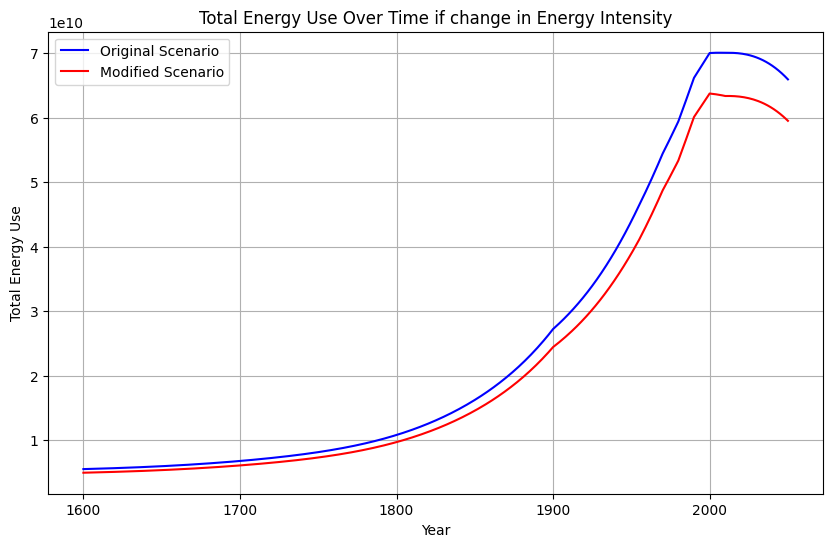

When we make the energy intensity 10% lower, the total energy use reduces by an average of 10.24%.


In [40]:
energy_intensity_modified = energy_intensity * 0.9

def energy_use_calculation_SFH(stock_c_UFA, energy_intensity_modified):
    energy_use_matrix = pd.DataFrame()
    for year in stock_c_UFA.columns:
        if int(year) <= 1955:
            intensity = energy_intensity_modified.loc[('pre 1955', 'SFH', 'OG'), 'Energy intensity  (kWh/m2a)']
        elif int(year) <= 1970:
            intensity = energy_intensity_modified.loc[('1956-70', 'SFH', 'OG'), 'Energy intensity  (kWh/m2a)']
        elif int(year) <= 1980:
            intensity = energy_intensity_modified.loc[('1971-80', 'SFH', 'OG'), 'Energy intensity  (kWh/m2a)']
        elif int(year) <= 1990:
            intensity = energy_intensity_modified.loc[('1981-90', 'SFH', 'OG'), 'Energy intensity  (kWh/m2a)']
        elif int(year) <= 2000:
            intensity = energy_intensity_modified.loc[('1991-2000', 'SFH', 'OG'), 'Energy intensity  (kWh/m2a)']
        elif int(year) <= 2010:
            intensity = energy_intensity_modified.loc[('2001-2010', 'SFH', 'OG'), 'Energy intensity  (kWh/m2a)']
        else:
            intensity = energy_intensity_modified.loc[('2011-', 'SFH', 'OG'), 'Energy intensity  (kWh/m2a)']
        
        iteration = pd.DataFrame(np.multiply(stock_c_UFA.loc[:, year], intensity))
        energy_use_matrix = pd.concat([energy_use_matrix, iteration], axis=1)
    return energy_use_matrix

def energy_use_calculation_TH (stock_c_UFA, energy_intensity_modified):
    energy_use_matrix = pd.DataFrame()
    for year in stock_c_UFA.columns:
        if int(year) <= 1955:
            intensity = energy_intensity_modified.loc[('pre 1955', 'SFH', 'OG'), 'Energy intensity  (kWh/m2a)']
        elif int(year) <= 1970:
            intensity = energy_intensity_modified.loc[('1956-70', 'SFH', 'OG'), 'Energy intensity  (kWh/m2a)']
        elif int(year) <= 1980:
            intensity = energy_intensity_modified.loc[('1971-80', 'SFH', 'OG'), 'Energy intensity  (kWh/m2a)']
        elif int(year) <= 1990:
            intensity = energy_intensity_modified.loc[('1981-90', 'SFH', 'OG'), 'Energy intensity  (kWh/m2a)']
        elif int(year) <= 2000:
            intensity = energy_intensity_modified.loc[('1991-2000', 'SFH', 'OG'), 'Energy intensity  (kWh/m2a)']
        elif int(year) <= 2010:
            intensity = energy_intensity_modified.loc[('2001-2010', 'SFH', 'OG'), 'Energy intensity  (kWh/m2a)']
        else:
            intensity = energy_intensity_modified.loc[('2011-', 'SFH', 'OG'), 'Energy intensity  (kWh/m2a)']
        
        iteration = pd.DataFrame(np.multiply(stock_c_UFA.loc[:, year], intensity))
        energy_use_matrix = pd.concat([energy_use_matrix, iteration], axis=1)
    return energy_use_matrix


def energy_use_calculation_AB (stock_c_UFA, energy_intensity_modified):
    energy_use_matrix = pd.DataFrame()
    for year in stock_c_UFA.columns:
        if int(year) <= 1955:
            intensity = energy_intensity_modified.loc[('pre 1955', 'SFH', 'OG'), 'Energy intensity  (kWh/m2a)']
        elif int(year) <= 1970:
            intensity = energy_intensity_modified.loc[('1956-70', 'SFH', 'OG'), 'Energy intensity  (kWh/m2a)']
        elif int(year) <= 1980:
            intensity = energy_intensity_modified.loc[('1971-80', 'SFH', 'OG'), 'Energy intensity  (kWh/m2a)']
        elif int(year) <= 1990:
            intensity = energy_intensity_modified.loc[('1981-90', 'SFH', 'OG'), 'Energy intensity  (kWh/m2a)']
        elif int(year) <= 2000:
            intensity = energy_intensity_modified.loc[('1991-2000', 'SFH', 'OG'), 'Energy intensity  (kWh/m2a)']
        elif int(year) <= 2010:
            intensity = energy_intensity_modified.loc[('2001-2010', 'SFH', 'OG'), 'Energy intensity  (kWh/m2a)']
        else:
            intensity = energy_intensity_modified.loc[('2011-', 'SFH', 'OG'), 'Energy intensity  (kWh/m2a)']
        
        iteration = pd.DataFrame(np.multiply(stock_c_UFA.loc[:, year], intensity))
        energy_use_matrix = pd.concat([energy_use_matrix, iteration], axis=1)
    return energy_use_matrix


energy_use_vector_SFH_modified = energy_use_calculation_SFH(s_UFA_c_SFH, energy_intensity_modified).sum(axis=1)
energy_use_vector_TH_modified = energy_use_calculation_TH(s_UFA_c_TH, energy_intensity_modified).sum(axis=1)
energy_use_vector_AB_modified = energy_use_calculation_AB(s_UFA_c_AB, energy_intensity_modified).sum(axis=1)

# Calculate total energy use for the modified scenario
modified_total_energy_use = energy_use_vector_SFH_modified + energy_use_vector_TH_modified + energy_use_vector_AB_modified

modified_total_energy_use

import matplotlib.pyplot as plt

# Assuming total_energy_use and modified_total_energy_use are already calculated
years = np.arange(1600, 2051)

plt.figure(figsize=(10, 6))
plt.plot(years, total_energy_use, label='Original Scenario', color='blue')
plt.plot(years, modified_total_energy_use, label='Modified Scenario', color='red')
plt.title('Total Energy Use Over Time if change in Energy Intensity')
plt.xlabel('Year')
plt.ylabel('Total Energy Use')
plt.legend()
plt.grid(True)
plt.show()

# Calculate the percentage reduction in total energy use
reduction_percentage = ((total_energy_use - modified_total_energy_use) / total_energy_use) * 100

# Calculate the average reduction percentage over the entire time period
average_reduction_percentage = reduction_percentage.mean()

# Print the average reduction percentage
print(f"When we make the energy intensity 10% lower, the total energy use reduces by an average of {average_reduction_percentage:.2f}%.")


Export model outputs

In [41]:
s_SFH_df.to_excel(directory_path / 
                 'data/model_outputs_baseline/number_of_dwellings/s_SFH.xlsx')

s_TH_df.to_excel(directory_path / 
                 'data/model_outputs_baseline/number_of_dwellings/s_TH.xlsx')

s_AB_df.to_excel(directory_path / 
                 'data/model_outputs_baseline/number_of_dwellings/s_AB.xlsx')

SFH_stock_by_tabula_cohort.to_excel(directory_path / 
                 'data/model_outputs_baseline/number_of_dwellings/s_c_SFH.xlsx')

TH_stock_by_tabula_cohort.to_excel(directory_path / 
                 'data/model_outputs_baseline/number_of_dwellings/s_c_TH.xlsx')

AB_stock_by_tabula_cohort.to_excel(directory_path / 
                 'data/model_outputs_baseline/number_of_dwellings/s_c_AB.xlsx')

stock_change_total.to_excel(directory_path / 
                 'data/model_outputs_baseline/number_of_dwellings/s_delta_total.xlsx')

total_stock_by_tabula_cohort.to_excel(directory_path / 
                 'data/model_outputs_baseline/number_of_dwellings/s_c_total.xlsx')

pd.DataFrame(i_SFH).to_excel(directory_path / 
                 'data/model_outputs_baseline/number_of_dwellings/i_SFH.xlsx')

pd.DataFrame(i_TH).to_excel(directory_path / 
                 'data/model_outputs_baseline/number_of_dwellings/i_TH.xlsx')

pd.DataFrame(i_AB).to_excel(directory_path / 
                 'data/model_outputs_baseline/number_of_dwellings/i_AB.xlsx')

o_total.to_excel(directory_path / 
                 'data/model_outputs_baseline/number_of_dwellings/o_total.xlsx')

i_total.to_excel(directory_path / 
                 'data/model_outputs_baseline/number_of_dwellings/i_total.xlsx')

s_UFA_c_SFH_df.to_excel(directory_path / 
                 'data/model_outputs_baseline/UFA/s_UFA_c_SFH.xlsx')

s_UFA_c_TH_df.to_excel(directory_path / 
                 'data/model_outputs_baseline/UFA/s_UFA_c_TH.xlsx')

s_UFA_c_AB_df.to_excel(directory_path / 
                 'data/model_outputs_baseline/UFA/s_UFA_c_AB.xlsx')

SFH_UFA_stock_by_tabula_cohort.to_excel(directory_path / 
                 'data/model_outputs_baseline/UFA/s_UFA_tabula_SFH.xlsx')

TH_UFA_stock_by_tabula_cohort.to_excel(directory_path / 
                 'data/model_outputs_baseline/UFA/s_UFA_tabula_TH.xlsx')

AB_UFA_stock_by_tabula_cohort.to_excel(directory_path / 
                 'data/model_outputs_baseline/UFA/s_UFA_tabula_AB.xlsx')

stock_change_total_UFA.to_excel(directory_path / 
                 'data/model_outputs_baseline/UFA/s_delta_total_UFA.xlsx')

total_stock_UFA_by_tabula_cohort.to_excel(directory_path / 
                 'data/model_outputs_baseline/UFA/s_UFA_tabula_total.xlsx')

i_SFH_UFA.to_excel(directory_path / 
                 'data/model_outputs_baseline/UFA/i_SFH_UFA.xlsx')

i_TH_UFA.to_excel(directory_path / 
                 'data/model_outputs_baseline/UFA/i_TH_UFA.xlsx')

i_AB_UFA.to_excel(directory_path / 
                 'data/model_outputs_baseline/UFA/i_AB_UFA.xlsx')

o_total_UFA.to_excel(directory_path / 
                 'data/model_outputs_baseline/UFA/o_total_UFA.xlsx')

i_total_UFA.to_excel(directory_path / 
                 'data/model_outputs_baseline/UFA/i_total_UFA.xlsx')

energy_use_vector_SFH.to_excel(directory_path / 
                 'data/model_outputs_baseline/energy/energy_use_vector_SFH.xlsx')

energy_use_vector_TH.to_excel(directory_path / 
                 'data/model_outputs_baseline/energy/energy_use_vector_TH.xlsx')

energy_use_vector_AB.to_excel(directory_path / 
                 'data/model_outputs_baseline/energy/energy_use_vector_AB.xlsx')

energy_use_matrix_total_tabula_cohort.to_excel(directory_path / 
                 'data/model_outputs_baseline/energy/energy_use_matrix_total_tabula.xlsx')

total_energy_use.to_excel(directory_path / 
                 'data/model_outputs_baseline/energy/total_energy_use.xlsx')